## Advanced EDA

https://www.kaggle.com/dgawlik/house-prices-eda

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../Data/Dataset.csv")

In [3]:
def categorisation(data,date_cols,target="price"):
    distance = []
    date = []
    numerique = []
    categorique = []
    for col in data.columns:
        if data[col].dtypes == np.object:
            try:
                if str(type(eval(data[col][data[col].first_valid_index()]))) == "<class 'list'>":
                    distance.append(col)
                elif col in date_cols:
                    date.append(col)
                else:
                    categorique.append(col)
            except:
                if col in date_cols:
                    date.append(col)
                else:
                    categorique.append(col)
                
            
        else :
            if col != target:
                numerique.append(col)
                
    return dict({"numerique":numerique,"categorique":categorique,"date":date,"distance":distance})

feat_cat = categorisation(data,["listing_date"])

In [4]:
feat_cat

{'numerique': ['bathrooms',
  'bedrooms',
  'erf_size',
  'floor_size',
  'garages',
  'listing_number',
  'pet_friendly',
  'garden',
  'pool',
  'secure_parking',
  'parking',
  'no_pets_allowed',
  'furnished',
  'flatlet',
  'fibre_internet',
  'furnished_(optional)',
  'adsl_internet',
  'satellite_internet',
  'fixed_wimax_internet'],
 'categorique': ['town', 'type_of_property'],
 'date': ['listing_date'],
 'distance': []}

## 1) Numerical

### by default,fill by 0 the missing value of binary features

In [5]:
to_fill = [
   'bathrooms',
  'bedrooms',
  'garages',
  'pet_friendly',
  'garden',
  'pool',
  'secure_parking',
  'parking',
  'no_pets_allowed',
  'furnished',
  'flatlet',
  'fibre_internet',
  'furnished_(optional)',
  'adsl_internet',
  'satellite_internet',
  'fixed_wimax_internet']

for c in to_fill:
    print(data[c].unique())
    data[c].fillna(0,inplace=True)
    


[ 3.   3.5  1.   4.5  1.5  8.   2.   5.   7.   nan  2.5 11.   4.   6.
 10.   8.5  5.5  9.   7.5 12.   0.5 15.   6.5 13.  14.   9.5 18.  30.
 25. ]
[ 3.   4.   2.   1.   6.   0.5  8.   nan  5.  11.  10.   7.   3.5  9.
 18.   1.5 12.   2.5 16.  13.  15.  33.   4.5 14.  30. ]
[ 2.   nan  3.   1.   4.  10.   5.   6.  20.   8.   1.5  7. ]
[ 1. nan]
[nan  1.]
[nan  1.]
[nan  2.  1.  5.  4.  6.  3.  8. 15. 10. 12. 11.  9.]
[nan  1.  8.  2.  5.  3.  4.  6. 11. 10.  7. 12.  9. 13. 50. 30.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]


### Pairplots between price vs numerical features

/home/tokyaxel/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


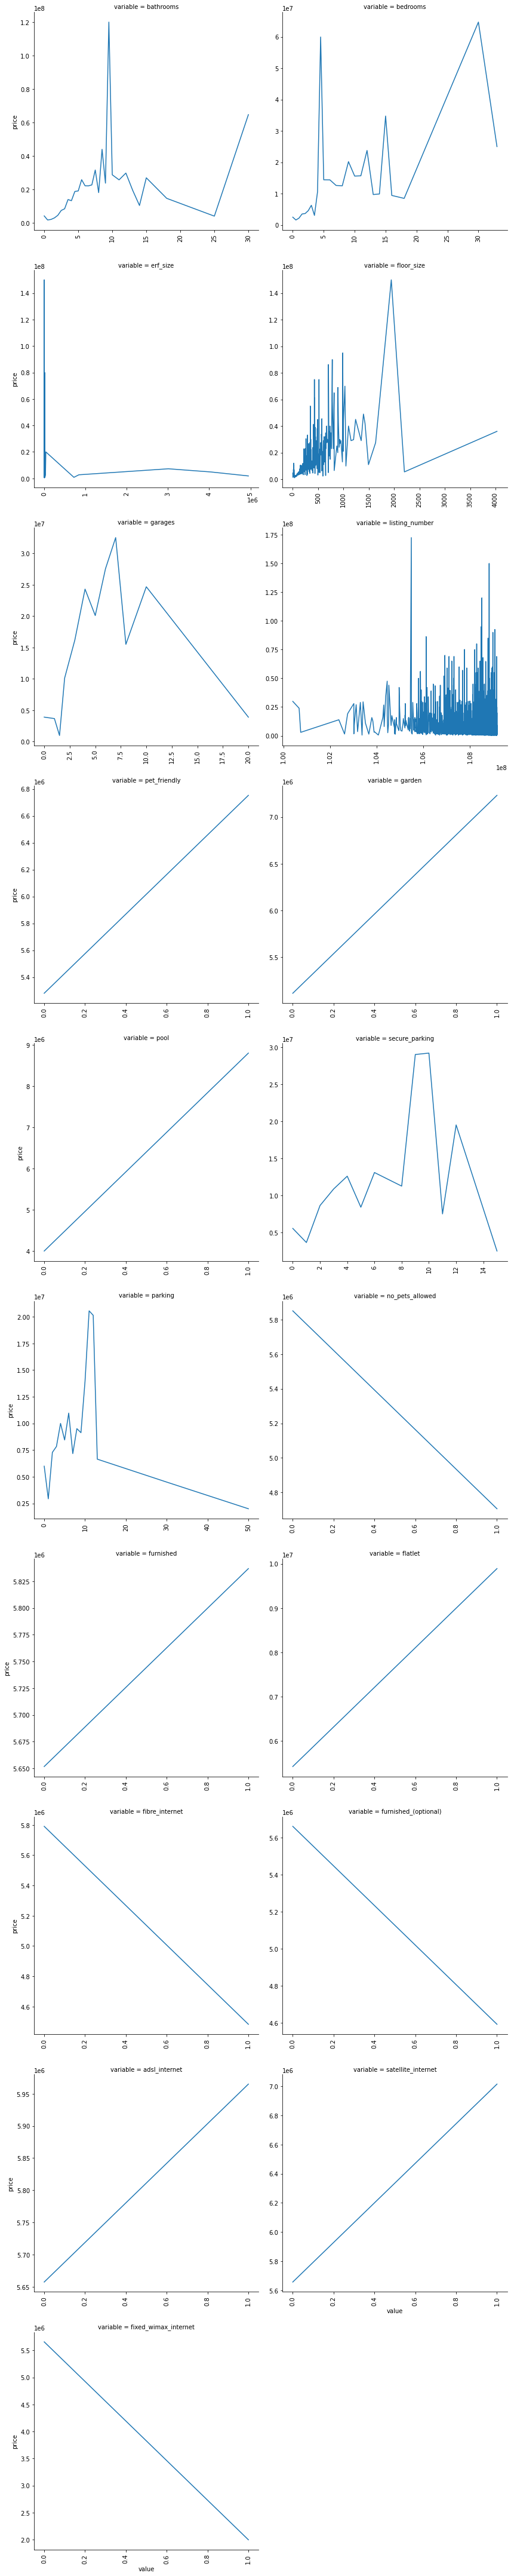

In [6]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
feats = feat_cat["numerique"]
f = pd.melt(data, id_vars=['price'], value_vars=feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=6)
g = g.map(pairplot, "value", "price")

### Correlation matrix

"Spearman" -> Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear.

<AxesSubplot:>

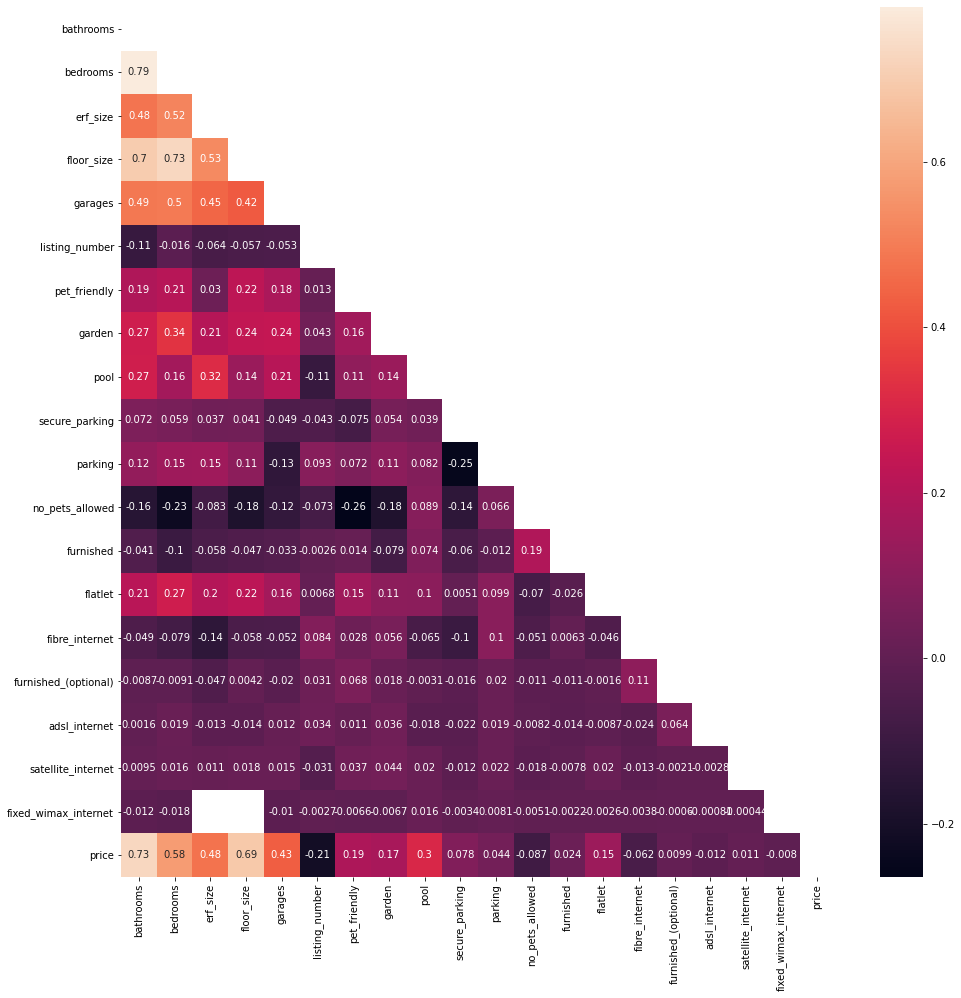

In [7]:
f, axes = plt.subplots(1, 1, figsize=(16, 16), sharex=False)
feats=feats+["price"]
matrix = np.triu(data[feats].corr(method='spearman'))
sns.heatmap(data[feats].corr(method='spearman'), annot=True,robust=False, mask=matrix, ax=axes)

Features with correlation with "price" are : (threshold > 0.5)
 - bathrooms 
 - floor size 
 - bedrooms
 

### Boxplots

In [8]:
data_b = data[data["price"]<=6000000]

In [9]:
to_box = [
    'bathrooms',
  'bedrooms',
  'garages',
  'pet_friendly',
  'garden',
  'pool',
  'secure_parking',
  'parking',
  'no_pets_allowed',
  'furnished',
  'flatlet',
  'fibre_internet',
  'furnished_(optional)',
  'adsl_internet',
  'satellite_internet',
  'fixed_wimax_internet'
]

/home/tokyaxel/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


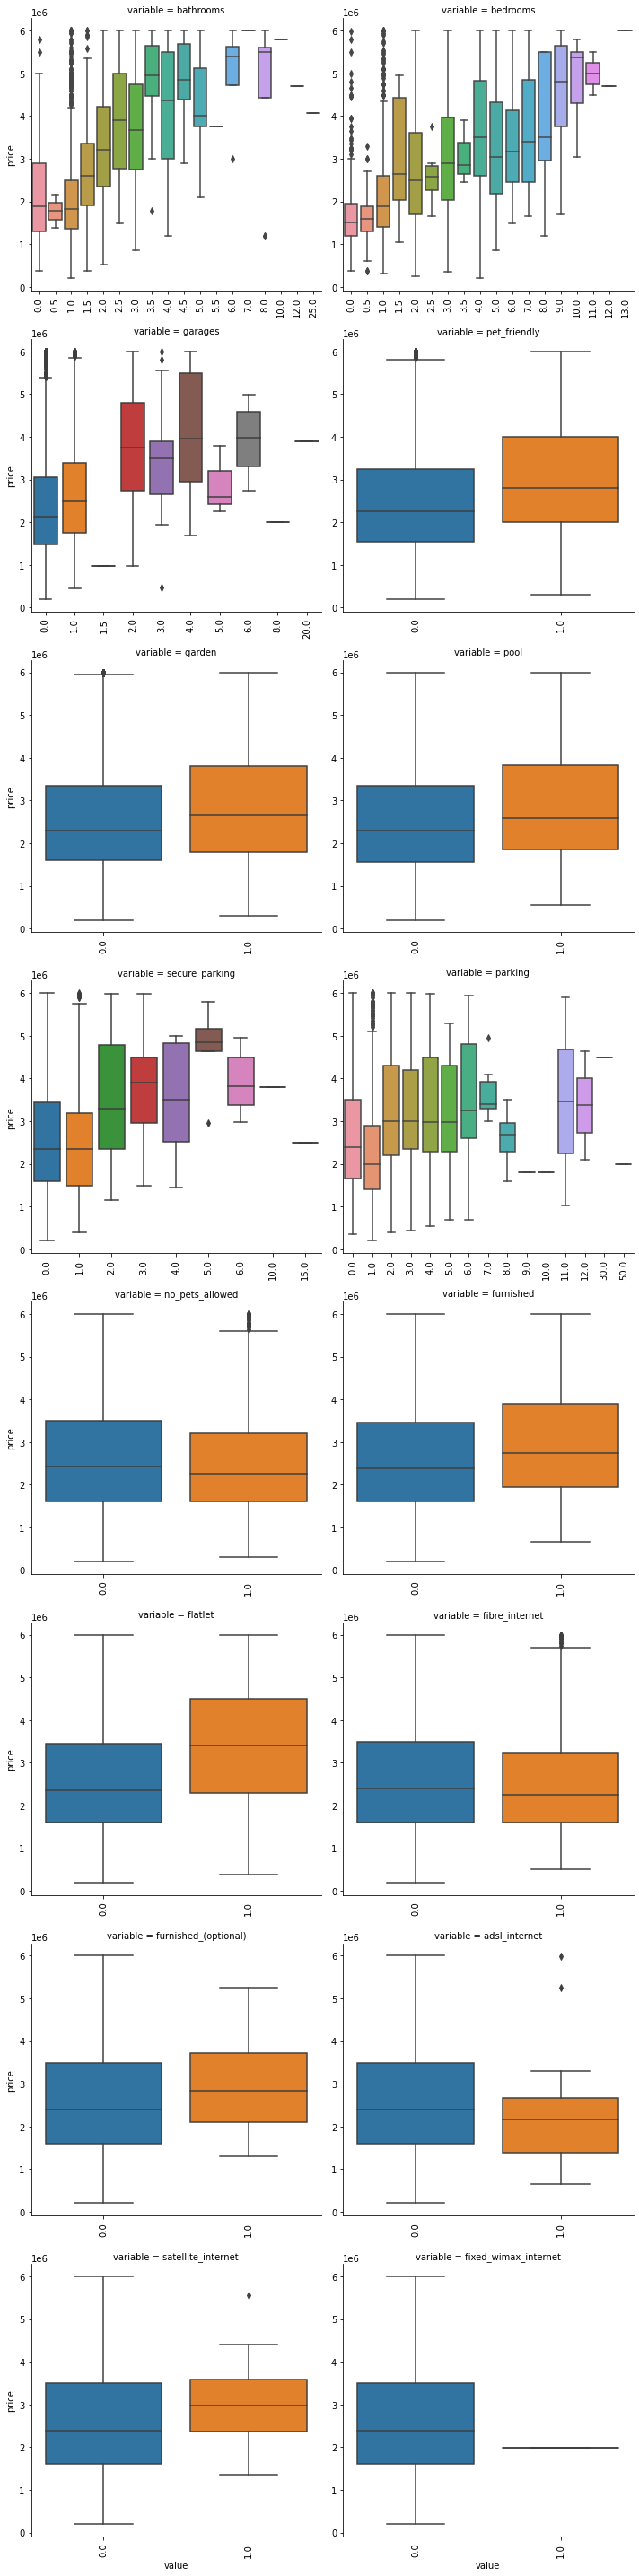

In [10]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(data_b, id_vars=['price'], value_vars=to_box)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

## 2) Categorical

In [11]:
feat_cat["categorique"]

['town', 'type_of_property']

In [12]:
categoric_f = [
 'type_of_property']
### not show town cause of high cardinality

In [13]:
data_t = data[data["price"]<=6000000]

/home/tokyaxel/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


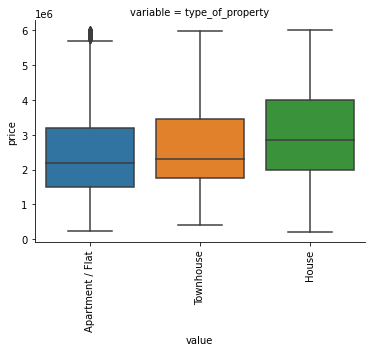

In [14]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(data_t, id_vars=['price'], value_vars=categoric_f)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

#### Constat :
- The price distribution increase from Apartement/Flat to House :
<b> House price have tendency to be more expensive than an Apartement and Townhouse </b>

## 3) All features and spearman's correlation

"Spearman" -> Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear.

['town_E', 'type_of_property_E']


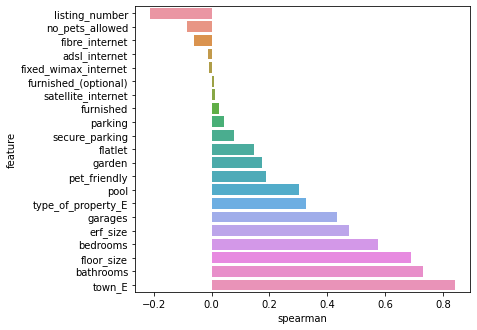

In [15]:
data_tmp = data.copy()

def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'price']].groupby(feature).mean()['price']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in feat_cat["categorique"]:  
    encode(data_tmp, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['price'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

numeric = feat_cat["numerique"]

features = numeric + qual_encoded
spearman(data_tmp, features)

#### Conclusions

Top correlated features :
- Town E 
- bathrooms (<b>as we can see in the  boxplot</b>, more there is bathrooms, more the price is higher)
- floor size
- bedrooms
- erf_size
- garages ( boxplot -> more there is garages, more price have tendency to be high)
- type_of_property
- pool (boxplot show that the mean of price is higher when pool equal 1)
- pet_friendly (boxplot show that the mean of price is higher when pet_friendly equal 1)

To confirm thoses hypothesis, test of student can be used to perform mean comparison